# DataFrame 


In [3]:
import pandas as pd

## 내부 속성과 메소드 확인하기

### Series와 DataFrame에 공통으로 있는 속성과 메소드


In [4]:
a = set(pd.Series.__dict__)
b = set(pd.DataFrame.__dict__)

ab = a & b
for i in list(ab) :
    if i.startswith("_") :
        pass
    else :
        print(i,end = " ")

aggregate corr kurtosis lt sum cumprod eq set_value to_string to_dict hist radd to_csv swaplevel mod rsub transform var product ge idxmax iteritems le sem expanding get_value round subtract rpow min nsmallest skew fillna reindex any sortlevel duplicated drop_duplicates shift to_timestamp rmod rolling axes rmul to_sparse mad median all apply rename dot div reindex_axis ewm prod sub unstack to_excel ne std diff dropna idxmin mul compound isin combine pow sort_values agg multiply mode append kurt rtruediv from_csv cov mean gt cummax first_valid_index count rdiv add cummin last_valid_index rfloordiv cumsum divide truediv floordiv quantile items reset_index reorder_levels sort_index align to_period combine_first plot memory_usage update index nlargest max 

### 데이터 프레임에만 있는 속성과 메소드

In [5]:
b_a = b-a

for i in list(b_a) :
    if i.startswith("_") :
        pass
    else :
        print(i,end = " ")

transpose from_records columns to_stata applymap boxplot query pivot to_records itertuples T shape iterrows to_feather join from_items eval info set_index insert to_html to_latex stack pivot_table lookup select_dtypes to_gbq from_dict nunique assign style merge to_panel melt corrwith 

## dataframe 생성



### 1차원 리스트로 생성하기

In [8]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
print(df)


   0
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


In [9]:
df[0]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: 0, dtype: int64

### 데이터 프레임 출력된 결과가 Series로 나오는 것을 볼 수 있다,

In [10]:
type(df[0])

pandas.core.series.Series

## 2차원 리스트로 생성하기

### 2차원 리스트로 판다스 생성하기

In [2]:
import pandas as pd

# Our small data set
d = [[0,1,2],[3,4,5],[6,7,8]]

# Create dataframe
df = pd.DataFrame(d)
print(df)

   0  1  2
0  0  1  2
1  3  4  5
2  6  7  8


In [3]:
type(df[0])

pandas.core.series.Series

In [4]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

### 내부의 원소를 문자열로 처리하기. 

In [1]:
import pandas as pd
import numpy as np

a = pd.DataFrame(["aaa","bbb","ccc","ddd","eee"])
print(a)
print(a[0].str)
print(a[0].str.len())

     0
0  aaa
1  bbb
2  ccc
3  ddd
4  eee
0    3
1    3
2    3
3    3
4    3
Name: 0, dtype: int64


## 딕셔너리로 데이터 프레임 생성

### 딕셔너리로 생성하기 

    딕셔너리의 키는 칼럼으로 가고 딕셔너리 내의 리스트 값은 실제 데이터로 간다.
    

In [50]:
import pandas as pd

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, columns=['BBB','CCC','AAA'])
print(df)

   BBB  CCC  AAA
0   10  100    4
1   20   50    5
2   30  -30    6
3   40  -50    7


### 복합 딕셔너리로 생성 

        칼럼과 index를 구성하는 2차원 시리즈이므로 딕셔너리에서는 이중 딕셔너리로 구성해서 생성이 가능
    

In [24]:
import pandas as pd
import numpy as np

data = {'AAA' : {'a' : 4,'b':5, 'c':6, 'd':7}, 
        'BBB' : {'a': 10, 'b' : 20, 'c':30, 'd': 40},
        'CCC' : {'a':100, 'b': 50, 'c': -30, 'd': -50} }
df = pd.DataFrame(data)
print(df)

   AAA  BBB  CCC
a    4   10  100
b    5   20   50
c    6   30  -30
d    7   40  -50


##  튜플원소를 가지는 리스트로 데이터 프레임 생성하기  

### zip으로 튜플의 원소인 리스트를 이용해서 생성하기 


In [7]:
import pandas as pd

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))


print(BabyDataSet)


[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


In [8]:
dict(BabyDataSet)

{'Bob': 968, 'Jessica': 155, 'John': 578, 'Mary': 77, 'Mel': 973}

In [9]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
print(df)

     Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973


### 딕셔너리 타입으로 처리할 때는 예외가 발생함

In [12]:
df1 = pd.DataFrame(data = dict(BabyDataSet), columns=['Names', 'Births'])
print(df1)

ValueError: If using all scalar values, you must pass an index

## 속성 이해하기 


### 타입과 모양, 행(index), 열(columns), 행렬에 대한 메타정보(axes)


In [17]:
import pandas as pd

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))

df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
print(df)
print(df.shape)



     Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973
(5, 2)


### 인덱스와 칼럼에 대한 정보 확인하기 

In [18]:
print(df.index)  # 행에 대한 부분
print(df.columns)  #칼럼에 대한 부분
print(df.axes)        # 행렬에 대한 축

RangeIndex(start=0, stop=5, step=1)
Index(['Names', 'Births'], dtype='object')
[RangeIndex(start=0, stop=5, step=1), Index(['Names', 'Births'], dtype='object')]


###  차원에 대한 정보를 확인한다

In [89]:
import pandas as pd

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))

df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

print(df.dtypes)
print(df.at.__dict__)
print("scalar accessor ",df.at[0,'Names'])
print(df.ndim, type(df.ndim))


Names     object
Births     int64
dtype: object
{'name': 'at', 'ndim': 2, 'obj':      Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973}
scalar accessor  Bob
2 <class 'int'>


### T(행과 열을 전환), size(원소갯수), values(값을numpy로 전환),loc(lable로 검색)을 이용해서 검색



In [92]:
import pandas as pd

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))

df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

print(df.T)
print(df.size)
print(df.values)
print(df.loc[0,'Names'])


          0        1     2     3    4
Names   Bob  Jessica  Mary  John  Mel
Births  968      155    77   578  973
10
[['Bob' 968]
 ['Jessica' 155]
 ['Mary' 77]
 ['John' 578]
 ['Mel' 973]]
Bob


## 내부의 데이터를 뷰로 보기

### blocks 속성으로 내부 데이터에 대한 정보를 조회

In [21]:
import pandas as pd

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))

df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

print(df.blocks)
print(type(df.blocks))



{'int64':    Births
0     968
1     155
2      77
3     578
4     973, 'object':      Names
0      Bob
1  Jessica
2     Mary
3     John
4      Mel}
<class 'dict'>


In [22]:
print(df.blocks['object'])
print(df.blocks['int64'])


     Names
0      Bob
1  Jessica
2     Mary
3     John
4      Mel
   Births
0     968
1     155
2      77
3     578
4     973


### Empty, ftypes, iat(행과열 숫자위치), iloc(행), ix(행) 등을 이용해서 검색


In [13]:
import pandas as pd

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))

df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

print(df.empty)
print(df.ftypes)



False
Names     object:dense
Births     int64:dense
dtype: object


### 암묵적인 인덱스를 처리해서 정보를 조회하기

In [14]:
print(df.iat.__dict__)
print("scalar accessor ",df.iat[0,1])
print(df.iloc.__dict__)
print(df.iloc[0])
print(df.ix[0])

{'obj':      Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973, 'ndim': 2, 'name': 'iat'}
scalar accessor  968
{'obj':      Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973, 'ndim': 2, 'name': 'iloc'}
Names     Bob
Births    968
Name: 0, dtype: object
Names     Bob
Births    968
Name: 0, dtype: object


/Users/dahlmoon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


## 생성방법 알아보기

### 칼럼 명 추가 및 Series를 이용한 DataFrame 생성


In [24]:
import pandas as pd

s = pd.Series([1,2,3,4], name="ser1")
p = pd.DataFrame(s)
print(p.values)
print(type(p.values))
print(type(p))
print(s)


[[1]
 [2]
 [3]
 [4]]
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
0    1
1    2
2    3
3    4
Name: ser1, dtype: int64


###  닷연산으로 속성을 확인하기

    시리즈로 만들 때 이름을 부여하면 이 이름을 가지고 내부의 칼럼정보를 확인할 수 있다.

In [25]:
print(p.ser1)
print(type(p.ser1))

0    1
1    2
2    3
3    4
Name: ser1, dtype: int64
<class 'pandas.core.series.Series'>


### 리스트를 가자고 데이터프레임을 만들기

In [26]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
print(df)


   0
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


### 칼럼을 추가하기

In [27]:
df.columns = ['Rev']
print(df)

   Rev
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9


In [28]:
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


### 칼럼의 이름을 실제 시리즈의 name 속성과 동일한 결과이다.

In [30]:
df.Rev

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Rev, dtype: int64

### 칼럼 추가 및 원소 값 추가

    스칼라로 넣으면 브로드 캐스팅되어 생성됨
    

In [58]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['NewCol'] = 5
print(df)


   Rev  NewCol
0    0       5
1    1       5
2    2       5
3    3       5
4    4       5
5    5       5
6    6       5
7    7       5
8    8       5
9    9       5


###  내부 원소 변경하기 


In [8]:
import pandas as pd

s = pd.Series([1,2,3,4], name="ser1")

p = pd.DataFrame(s)

print(p)
p['ser1'][0] = 99
print(p)

   ser1
0     1
1     2
2     3
3     4
   ser1
0    99
1     2
2     3
3     4


### 칼럼 내의 원소 값 변경 

In [61]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['NewCol'] = 5
df['NewCol'] = df['NewCol'] + 1
print(df)


   Rev  NewCol
0    0       6
1    1       6
2    2       6
3    3       6
4    4       6
5    5       6
6    6       6
7    7       6
8    8       6
9    9       6


### 칼럼 삭제 

In [62]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['NewCol'] = 5
df['NewCol'] = df['NewCol'] + 1
del df['NewCol']
print(df)


   Rev
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9


### 여러 개의 Series를 하나의 DataFrame에 추가하기



In [15]:
import pandas as pd


c1 = pd.Series([603105,-405885,283715,365410, 302876, 393534], name='foreigner')
c2= pd.Series([69.15, 68.99, 69.09, 69.02, 68.93, 68.85], name='sratio')

data = { ser.name : ser.values for ser in [c1,c2]}


#### 시리즈를 반드시 하나의 딕셔너리에 넣고 처리해야 시르지의 결과가 칼럼으로 간다

In [16]:
data

{'foreigner': array([ 603105, -405885,  283715,  365410,  302876,  393534]),
 'sratio': array([ 69.15,  68.99,  69.09,  69.02,  68.93,  68.85])}

In [17]:
d = pd.DataFrame(data)
print(d)

   foreigner  sratio
0     603105   69.15
1    -405885   68.99
2     283715   69.09
3     365410   69.02
4     302876   68.93
5     393534   68.85


In [12]:
import pandas as pd
d = {'a':1, 'b':2, 'c':3, 'd':4}

obj1 = pd.Series(d, name="series 1")
obj2 = pd.Series(d, name="series 2")


df1 = pd.DataFrame(obj1)
print(df1.__dict__)
print(df1)


{'is_copy': None, '_data': BlockManager
Items: Index(['series 1'], dtype='object')
Axis 1: Index(['a', 'b', 'c', 'd'], dtype='object')
IntBlock: slice(0, 1, 1), 1 x 4, dtype: int64, '_item_cache': {}}
   series 1
a         1
b         2
c         3
d         4


###  시리즈를 배열로 묶어서 데이터 프레임을 만들면 행으로 들어간다

In [13]:
import pandas as pd
d = {'a':1, 'b':2, 'c':3, 'd':4}

obj1 = pd.Series(d, name="series 1")
obj2 = pd.Series(d, name="series 2")

df2 = pd.DataFrame([obj1,obj2])
print(df2.__dict__)
print(df2)

{'is_copy': None, '_data': BlockManager
Items: Index(['a', 'b', 'c', 'd'], dtype='object')
Axis 1: Index(['series 1', 'series 2'], dtype='object')
IntBlock: slice(0, 4, 1), 4 x 2, dtype: int64, '_item_cache': {}}
          a  b  c  d
series 1  1  2  3  4
series 2  1  2  3  4


## 인덱싱 처리 

    기존 칼럼명을 조회해서 새로운 칼럼 추가


### 데이터 프레임에 하나의 칼럼명을 할당

In [18]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']



In [19]:
df.columns

Index(['Rev'], dtype='object')

### 인덱싱을 통해 하나의 칼럼을 추기

In [20]:
df['col'] = df['Rev']
print(df)



   Rev  col
0    0    0
1    1    1
2    2    2
3    3    3
4    4    4
5    5    5
6    6    6
7    7    7
8    8    8
9    9    9


### 인덱스 즉 행의 명칭 추가 


In [21]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df)


   Rev  col
a    0    0
b    1    1
c    2    2
d    3    3
e    4    4
f    5    5
g    6    6
h    7    7
i    8    8
j    9    9


### 칼럼과 인덱스 조회하기 


In [14]:
import pandas as pd
d = {'a':1, 'b':2, 'c':3, 'd':4}

obj1 = pd.Series(d, name="series 1")
obj2 = pd.Series(d, name="series 2")

df2 = pd.DataFrame([obj1,obj2])
print(df2.__dict__)
print(df2.axes[0])
print(df2.index)
print(df2.axes[1])
print(df2.columns)

{'is_copy': None, '_data': BlockManager
Items: Index(['a', 'b', 'c', 'd'], dtype='object')
Axis 1: Index(['series 1', 'series 2'], dtype='object')
IntBlock: slice(0, 4, 1), 4 x 2, dtype: int64, '_item_cache': {}}
Index(['series 1', 'series 2'], dtype='object')
Index(['series 1', 'series 2'], dtype='object')
Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['a', 'b', 'c', 'd'], dtype='object')


## 검색하기 

    dataframe은 기본으로 칼럼 단위로 조회를 한다.
    행단위로 조회하기 위해서는 별도의 방식으로 조회가 필요해서 속성들을 이용해서 검색해야한다.
    
    

###  일반 열(칼럼) 검색하기



In [66]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df['Rev'])


a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: Rev, dtype: int64


### 일반 열의 이름을 나열해서 멀티 칼럼 조회하기 


In [67]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df[['Rev', 'col']])


   Rev  col
a    0    0
b    1    1
c    2    2
d    3    3
e    4    4
f    5    5
g    6    6
h    7    7
i    8    8
j    9    9


###  loc 속성을 이용해서 행단위(index) 로 조회하기

    인덱스의 정보를 가지고 행단위로 조회할 수 있다.

In [64]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df.loc['a'])


Rev    0
col    0
Name: a, dtype: int64


### 멀티 행을 조회하기 위해서는 슬라이싱을 이용해서 처리한다.

In [65]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df.loc['a':'c'])


   Rev  col
a    0    0
b    1    1
c    2    2


###  loc 속성을 이용해서 칼럼과 인덱스 명으로 검색

    칼럼명과 인덱스 명을 넣어서 행과 열을 조회한다.


In [16]:
import pandas as pd
d = {'a':1, 'b':2, 'c':3, 'd':4}

obj1 = pd.Series(d, name="series 1")
obj2 = pd.Series(d, name="series 2")

df2 = pd.DataFrame([obj1,obj2])
print(df2)
print(df2.loc["series 1"])
print(type(df2.loc["series 1"]))
print(df2.loc["series 1",'a'])
print(type(df2.loc["series 1",'a']))

          a  b  c  d
series 1  1  2  3  4
series 2  1  2  3  4
a    1
b    2
c    3
d    4
Name: series 1, dtype: int64
<class 'pandas.core.series.Series'>
1
<class 'numpy.int64'>


### at 속성을 이용해서 칼람명과 index에 의해 조회


In [15]:
import pandas as pd
d = {'a':1, 'b':2, 'c':3, 'd':4}

obj1 = pd.Series(d, name="series 1")
obj2 = pd.Series(d, name="series 2")

df2 = pd.DataFrame([obj1,obj2])
print(df2)
print(df2.at["series 1",'a'])
print(type(df2.at["series 1",'a']))

          a  b  c  d
series 1  1  2  3  4
series 2  1  2  3  4
1
<class 'numpy.int64'>


### ix 속성을 이용해서 정수로 검색


####  행을 조회하기 

    숫자를 넣어 행의 정보를 조회한다.

In [74]:
import pandas as pd
d = {'a':1, 'b':2, 'c':3, 'd':4}

obj1 = pd.Series(d, name="series 1")
obj2 = pd.Series(d, name="series 2")

df2 = pd.DataFrame([obj1,obj2])
print(df2)
print(df2.ix[0])
print(type(df2.ix[0]))


          a  b  c  d
series 1  1  2  3  4
series 2  1  2  3  4
a    1
b    2
c    3
d    4
Name: series 1, dtype: int64
<class 'pandas.core.series.Series'>


####  실제 행을 중심으로 열의 값을 조회해서 값을 검색한다.


In [75]:
print(df2.ix[0,1])
print(type(df2.ix[0,1]))

2
<class 'numpy.int64'>


####  슬라이스로 조회시 행으로 검색한다.

    ix로 조회시도 마지막도 조회된다.

In [79]:

import numpy as np
import pandas as pd

A = np.array(['one', 'one', 'two', 'two', 'three', 'three'])
B = np.array(['start', 'end']*3)
C = [np.random.randint(10, 99, 6)]*6

df = pd.DataFrame(list(zip(A, B, C)), columns=['A', 'B', 'C'])
print(df)

print(".....",df.ix[0:1])
print(".....", df[0:1])


       A      B                         C
0    one  start  [47, 59, 55, 31, 91, 23]
1    one    end  [47, 59, 55, 31, 91, 23]
2    two  start  [47, 59, 55, 31, 91, 23]
3    two    end  [47, 59, 55, 31, 91, 23]
4  three  start  [47, 59, 55, 31, 91, 23]
5  three    end  [47, 59, 55, 31, 91, 23]
.....      A      B                         C
0  one  start  [47, 59, 55, 31, 91, 23]
1  one    end  [47, 59, 55, 31, 91, 23]
.....      A      B                         C
0  one  start  [47, 59, 55, 31, 91, 23]


#### ix를 이용해서 행과 열을 조회

    정수나 슬라이스로 행을 주고 칼럼명을 주어 열을 조회하면 행과열에 대한 정보를 조회한다.
    

In [68]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df.ix[0:3,'Rev'])


a    0
b    1
c    2
Name: Rev, dtype: int64


####  ix를 이용해서 멀티 열 조회하기

    멀티 열에 대한 정보를 배열로 제공하면 행과 열에 대한 검색이 가능하다.

In [69]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df.ix[:3,['col', 'Rev']])


   col  Rev
a    0    0
b    1    1
c    2    2


### 논리 검색 후 갱신하기



In [18]:
import pandas as pd

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data)

print(df)
df.ix[df.AAA >= 5,'BBB'] = -1
print(df)
df.ix[df.AAA >= 5,['BBB','CCC']] = 555
print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50
   AAA  BBB  CCC
0    4   10  100
1    5   -1   50
2    6   -1  -30
3    7   -1  -50
   AAA  BBB  CCC
0    4   10  100
1    5  555  555
2    6  555  555
3    7  555  555


In [20]:
import pandas as pd

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))
print(df)
#column 명으로 조회
print(df.AAA)
print(df.BBB)
print(df.CCC)


   CCC  BBB  AAA
a  100   10    4
b   50   20    5
c  -30   30    6
d  -50   40    7
a    4
b    5
c    6
d    7
Name: AAA, dtype: int64
a    10
b    20
c    30
d    40
Name: BBB, dtype: int64
a    100
b     50
c    -30
d    -50
Name: CCC, dtype: int64


### 칼럼명은 객체 접근 연산을 이용해서 처리 가능

    객체 접근 처럼 칼럼단위로 조회 및 갱신 
    

In [21]:
import pandas as pd

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))
print(df)
#column 단위 갱신 
df.AAA = 999
print(df.AAA)



   CCC  BBB  AAA
a  100   10    4
b   50   20    5
c  -30   30    6
d  -50   40    7
a    999
b    999
c    999
d    999
Name: AAA, dtype: int64


In [22]:
import pandas as pd
import numpy as np

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))
print(df)
#column 단위 갱신 
df['AAA'] = np.arange(4)
print(df.AAA)

   CCC  BBB  AAA
a  100   10    4
b   50   20    5
c  -30   30    6
d  -50   40    7
a    0
b    1
c    2
d    3
Name: AAA, dtype: int32


In [23]:
import pandas as pd
import numpy as np

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))
print(df)
#column 단위 갱신 
df['a'] = 999
print(df)

   CCC  BBB  AAA
a  100   10    4
b   50   20    5
c  -30   30    6
d  -50   40    7
   CCC  BBB  AAA    a
a  100   10    4  999
b   50   20    5  999
c  -30   30    6  999
d  -50   40    7  999


In [25]:
import pandas as pd
import numpy as np

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))
print(df)

   CCC  BBB  AAA
a  100   10    4
b   50   20    5
c  -30   30    6
d  -50   40    7


### index는 하나씩 변경은 불가하지만 전체를 대체할 수 있다.



In [26]:
import pandas as pd
import numpy as np

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))

df.index[0] = 'z'

TypeError: Index does not support mutable operations

In [28]:
import pandas as pd
import numpy as np

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))

df.index = ['z','y','x','w']
print(df)

   CCC  BBB  AAA
z  100   10    4
y   50   20    5
x  -30   30    6
w  -50   40    7


In [29]:
import pandas as pd
import numpy as np

data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}
df = pd.DataFrame(data, 
                  index=['a','b','c','d'], 
                  columns=list(data.keys()))
print(df)
print(df.index)
df.index = ['z','x','y','t']
print(df)
print(df.index)

   CCC  BBB  AAA
a  100   10    4
b   50   20    5
c  -30   30    6
d  -50   40    7
Index(['a', 'b', 'c', 'd'], dtype='object')
   CCC  BBB  AAA
z  100   10    4
x   50   20    5
y  -30   30    6
t  -50   40    7
Index(['z', 'x', 'y', 't'], dtype='object')


### reindex 처리 하기



In [6]:
help(df.reindex)

Help on method reindex in module pandas.core.frame:

reindex(index=None, columns=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Conform DataFrame to new index with optional filling logic, placing
    NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    copy=False
    
    Parameters
    ----------
    index, columns : array-like, optional (can be specified in order, or as
        keywords)
        New labels / index to conform to. Preferably an Index object to
        avoid duplicating data
    method : {None, 'backfill'/'bfill', 'pad'/'ffill', 'nearest'}, optional
        method to use for filling holes in reindexed DataFrame.
        Please note: this is only  applicable to DataFrames/Series with a
        monotonically increasing/decreasing index.
    
        * default: don't fill gaps
        * pad / ffill: propagate last valid observation forward to next
          

In [4]:
import pandas as pd
import numpy as np

a = pd.DataFrame([1,2,3,4,5])
print(a)
b = a.reindex(index=['a','b','c','d','e','f'])
print(b)

   0
0  1
1  2
2  3
3  4
4  5
    0
a NaN
b NaN
c NaN
d NaN
e NaN
f NaN


In [5]:
import pandas as pd
import numpy as np

dates = pd.date_range('20130101', periods=6)
date7 = pd.date_range('20130101', periods=7)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)
print(df.reindex(index=date7,method='ffill'))

                   A         B         C         D
2013-01-01 -1.288119  1.726930  0.608596 -0.607587
2013-01-02 -0.771351 -0.438162 -1.615870  0.160002
2013-01-03  0.945229 -0.586036 -1.100246 -0.371784
2013-01-04  1.298379  0.124098  1.285135 -0.998753
2013-01-05  0.713224  1.312088 -0.119689  2.069361
2013-01-06 -0.092689 -0.830337 -0.737242 -0.689488
                   A         B         C         D
2013-01-01 -1.288119  1.726930  0.608596 -0.607587
2013-01-02 -0.771351 -0.438162 -1.615870  0.160002
2013-01-03  0.945229 -0.586036 -1.100246 -0.371784
2013-01-04  1.298379  0.124098  1.285135 -0.998753
2013-01-05  0.713224  1.312088 -0.119689  2.069361
2013-01-06 -0.092689 -0.830337 -0.737242 -0.689488
2013-01-07 -0.092689 -0.830337 -0.737242 -0.689488


In [33]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  index=['a','b','c','d'],
                  columns=['f','g','h','i'])
print(df)
print(df.reindex( columns=["f","c","g","h"],fill_value=0))
print(df.reindex( index=["a","c","e","d"],fill_value=0))

    f   g   h   i
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15
    f  c   g   h
a   0  0   1   2
b   4  0   5   6
c   8  0   9  10
d  12  0  13  14
    f   g   h   i
a   0   1   2   3
c   8   9  10  11
e   0   0   0   0
d  12  13  14  15


In [32]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  index=['a','b','c','d'],
                  columns=['f','g','h','i'])

print(df.reindex(["d","c","b","a","e"], fill_value=0))
lr = list(df.index)
lr.reverse()
print(lr)
print(df.reindex(lr))

    f   g   h   i
d  12  13  14  15
c   8   9  10  11
b   4   5   6   7
a   0   1   2   3
e   0   0   0   0
['d', 'c', 'b', 'a']
    f   g   h   i
d  12  13  14  15
c   8   9  10  11
b   4   5   6   7
a   0   1   2   3


### matplotlib으로 그래프 그리기


   ser1  ser2
0     1     1
1     2     2
2     3     3
3     4     4


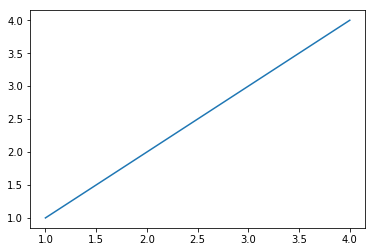

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

s = pd.Series([1,2,3,4], name="ser1")

s1 = pd.Series([1,2,3,4], name="ser2")

p = pd.DataFrame({'ser1':s, "ser2":s1})
print(p)
plt.plot(p["ser1"],p["ser2"])
plt.show()

In [30]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  index=['a','b','c','d'],
                  columns=['f','g','h','i'])
    
print(df.add(df))
print(df.sub(df))
print(df.mul(df))

    f   g   h   i
a   0   2   4   6
b   8  10  12  14
c  16  18  20  22
d  24  26  28  30
   f  g  h  i
a  0  0  0  0
b  0  0  0  0
c  0  0  0  0
d  0  0  0  0
     f    g    h    i
a    0    1    4    9
b   16   25   36   49
c   64   81  100  121
d  144  169  196  225


### 산술 연산 하기


In [31]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  index=['a','b','c','d'],
                  columns=['f','g','h','i'])
    
print(df.truediv(df))
print(df.floordiv(df))
print(df.mod(df))

     f    g    h    i
a  NaN  1.0  1.0  1.0
b  1.0  1.0  1.0  1.0
c  1.0  1.0  1.0  1.0
d  1.0  1.0  1.0  1.0
     f    g    h    i
a  NaN  1.0  1.0  1.0
b  1.0  1.0  1.0  1.0
c  1.0  1.0  1.0  1.0
d  1.0  1.0  1.0  1.0
     f    g    h    i
a  NaN  0.0  0.0  0.0
b  0.0  0.0  0.0  0.0
c  0.0  0.0  0.0  0.0
d  0.0  0.0  0.0  0.0


## 인덱스 및 칼럼 제거하기 


In [52]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  index=['a','b','c','d'],
                  columns=['f','g','h','i'])
print(df)
print(df.drop(['a','b']))


    f   g   h   i
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15
    f   g   h   i
c   8   9  10  11
d  12  13  14  15


#### 칼럼 제거

In [54]:
print(df.drop(['f','g'],axis=1))
print(df)

    h   i
a   2   3
b   6   7
c  10  11
d  14  15
    f   g   h   i
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15


### 없는 칼럼 조회 

In [39]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  columns=['f','g','h','i'])
print(df)
print(df['a'])

    f   g   h   i
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


KeyError: 'a'

### get 메소드로 없는 인덱스 조회

import pandas as pd
import numpy as np

df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  columns=['f','g','h','i'])
print(df)
print(df.get('a'))
print(df.get('b', np.nan))

###  정렬하기

In [41]:
import pandas as pd
import numpy as np

l= [2,6,7,9,10,11,0,1,3,5,4,8]
nl = np.array(l).reshape(3,4)
a = pd.DataFrame(nl,index=['a','b','c'],
              columns=['c1','c2','c3','c4'],dtype=np.int_)
print(a)
print(a.sort_values(by='c1'))

   c1  c2  c3  c4
a   2   6   7   9
b  10  11   0   1
c   3   5   4   8
   c1  c2  c3  c4
a   2   6   7   9
c   3   5   4   8
b  10  11   0   1


In [42]:
import pandas as pd
import numpy as np

dates = pd.date_range('20130101', periods=6)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)
print(df.sort_index(axis=1, ascending=False))
print(df.sort_index(axis=0, ascending=False))

                   A         B         C         D
2013-01-01 -0.998039 -2.655716  0.946167  0.687842
2013-01-02 -0.562302  1.139157 -1.298130 -0.708824
2013-01-03  0.886908 -0.235875  0.425401  0.142060
2013-01-04  0.898335 -0.502028  0.119585  0.716405
2013-01-05 -1.293664  0.076078  0.252281 -0.367762
2013-01-06  0.276196 -0.193636  0.082259  0.579642
                   D         C         B         A
2013-01-01  0.687842  0.946167 -2.655716 -0.998039
2013-01-02 -0.708824 -1.298130  1.139157 -0.562302
2013-01-03  0.142060  0.425401 -0.235875  0.886908
2013-01-04  0.716405  0.119585 -0.502028  0.898335
2013-01-05 -0.367762  0.252281  0.076078 -1.293664
2013-01-06  0.579642  0.082259 -0.193636  0.276196
                   A         B         C         D
2013-01-06  0.276196 -0.193636  0.082259  0.579642
2013-01-05 -1.293664  0.076078  0.252281 -0.367762
2013-01-04  0.898335 -0.502028  0.119585  0.716405
2013-01-03  0.886908 -0.235875  0.425401  0.142060
2013-01-02 -0.562302  1.139157 

### 원소의 갯수 알아보기 


In [43]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, 2, np.nan, 2, 1, 2, 3]})
print(df)
print(df.count())

df1 = pd.DataFrame({'A': [1, 2, 3, 2, 1, 2, 3]})
print(df1.count())

     A
0  1.0
1  2.0
2  NaN
3  2.0
4  1.0
5  2.0
6  3.0
A    6
dtype: int64
A    7
dtype: int64


###  원소 내부 변경하기

In [44]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, 2, np.nan, 2, 1, 2, 3]})
print(df)
print("element ",df.get_value(0,'A'))
print(df.set_value(2,'A',99))

     A
0  1.0
1  2.0
2  NaN
3  2.0
4  1.0
5  2.0
6  3.0
element  1.0
      A
0   1.0
1   2.0
2  99.0
3   2.0
4   1.0
5   2.0
6   3.0


In [ ]:
### 특정 데이터 부분만 윗부분과 아래 부분을 검색해서 출력 

    head, tail로 처리한다. defaults는 5이다.

In [70]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df.head())


   Rev  col
a    0    0
b    1    1
c    2    2
d    3    3
e    4    4


In [71]:
import pandas as pd

# Our small data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df.columns = ['Rev']
df['col'] = df['Rev']
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
print(df.tail())


   Rev  col
f    5    5
g    6    6
h    7    7
i    8    8
j    9    9


### multi index 를 만들어서 처리하기

    멀티 인덱스를 정의하기 위해서는 행에 대한 모든 정보를 이용해서 쌍으로 만들어야 한다.
    

In [81]:
import pandas as pd
import numpy as np

arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
           ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
           
tuples = list(zip(*arrays))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(3, 8), index=['A', 'B', 'C'], columns=index)
print(df)
print(df['bar'])
print(df['bar','one'])
print(df['bar']['one'])


first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -0.962743 -0.866579  0.240345  0.691635  1.280132 -1.680637 -0.413200   
B       0.899027  0.502681  0.742018 -0.522678  0.247022 -1.015849 -1.308242   
C       1.371179  0.773300  0.192510 -0.903093  0.485850  0.856765  0.878573   

first             
second       two  
A      -0.252350  
B      -0.183569  
C      -0.958156  
second       one       two
A      -0.962743 -0.866579
B       0.899027  0.502681
C       1.371179  0.773300
A   -0.962743
B    0.899027
C    1.371179
Name: (bar, one), dtype: float64
A   -0.962743
B    0.899027
C    1.371179
Name: one, dtype: float64


#### loc속성을 이용해서 멀티 인덱스를 조회

    내부에 실제 필요한 행 정보를 전부 부여해야 한다.
    

In [85]:
import numpy as np
import pandas as pd

A = np.array(['one', 'one', 'two', 'two', 'three', 'three'])
B = np.array(['start', 'end']*3)
C = [np.random.randint(10, 99, 6)]*6
df = pd.DataFrame(list(zip(A, B, C)), columns=['A', 'B', 'C'])

#2개 열을 index로 지정
df.set_index(['A', 'B'], inplace=True)
print(df)
print("df.loc",df.loc['one'])
print("df.loc[one,start]", df.loc['one','start'])


                                    C
A     B                              
one   start  [70, 57, 22, 89, 18, 46]
      end    [70, 57, 22, 89, 18, 46]
two   start  [70, 57, 22, 89, 18, 46]
      end    [70, 57, 22, 89, 18, 46]
three start  [70, 57, 22, 89, 18, 46]
      end    [70, 57, 22, 89, 18, 46]
df.loc                               C
B                              
start  [70, 57, 22, 89, 18, 46]
end    [70, 57, 22, 89, 18, 46]
df.loc[one,start] C    [70, 57, 22, 89, 18, 46]
Name: (one, start), dtype: object


#### iloc는 정수값을 넣어 멀티 행을 조회해서 처리한다.


In [87]:
import numpy as np
import pandas as pd

A = np.array(['one', 'one', 'two', 'two', 'three', 'three'])
B = np.array(['start', 'end']*3)
C = [np.random.randint(10, 99, 6)]*6
df = pd.DataFrame(list(zip(A, B, C)), columns=['A', 'B', 'C'])
#2개 열을 index로 지정
df.set_index(['A', 'B'], inplace=True)
print(df)
print("df.iloc[0:3]", df.iloc[0:3])


                                    C
A     B                              
one   start  [97, 47, 78, 21, 61, 10]
      end    [97, 47, 78, 21, 61, 10]
two   start  [97, 47, 78, 21, 61, 10]
      end    [97, 47, 78, 21, 61, 10]
three start  [97, 47, 78, 21, 61, 10]
      end    [97, 47, 78, 21, 61, 10]
df.iloc[0:3]                                   C
A   B                              
one start  [97, 47, 78, 21, 61, 10]
    end    [97, 47, 78, 21, 61, 10]
two start  [97, 47, 78, 21, 61, 10]


### 그룹 처리하기 : groupby



####  단일 칼럼을 기준으로 그루핑 처리


In [95]:
import pandas as pd
import inspect as ins

d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Create dataframe
df1 = pd.DataFrame(d)
print(df1)
one = df1.groupby('letter')
print(one)
print(one.sum())


  letter  one  two
0      a    1    2
1      a    1    2
2      b    1    2
3      b    1    2
4      c    1    2
        one  two
letter          
a         2    4
b         2    4
c         1    2


#### 멀티 칼럼에 대한 그룹 처리 


In [96]:
import pandas as pd
import inspect as ins

d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Create dataframe
df1 = pd.DataFrame(d)
letterone = df1.groupby(['letter','one']).sum()
print(letterone)


            two
letter one     
a      1      4
b      1      4
c      1      2


#### as_index=False로 처리해서 grouby메소드 이후에도 index구성이 변하지 않도록 처리




In [98]:
import pandas as pd
import inspect as ins

d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Create dataframe
df1 = pd.DataFrame(d)
lettertwo = df1.groupby(['letter','one'], as_index=False).sum()
print(lettertwo)
print(lettertwo.index)


  letter  one  two
0      a    1    4
1      b    1    4
2      c    1    2
Int64Index([0, 1, 2], dtype='int64')
